| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

This notebook is licensed under GPL 3.0. Please visit our [Github repo](https://github.com/edgi-govdata-archiving/ECHO-Cross-Program) for more information.

The notebook was collaboratively authored by EDGI following our [authorship protocol](https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/).

For more information about this project, visit https://www.environmentalenforcementwatch.org/

Note:  This notebook pulls data from a copy of EPA's ECHO database hosted by Stony Brook University. The data sets are updated on a weekly basis, meaning that some of the results from your run may not exactly match those in [EEW's Congressional Report Cards](https://www.environmentalenforcementwatch.org/reports). For instance, the Report Cards show ten facilities that have spent at least three of the past 12 quarters in non-compliance with different environmental protection laws. These results will therefore change as we enter new parts of the year. In addition, the Report Cards estimate the number of facilities that were active in 2019, since EPA does not provide such figures. Our estimate is based on the number of facilities EPA records as active at the *current* moment in time. In short, we use active right now as a proxy for active in 2019. This number informs several metrics in the Report Cards - including violations and inspections per 1000 facilities - and these will change as the number of facilities reported as active right now by the EPA changes. Please see the [CD-Report repo](https://github.com/edgi-govdata-archiving/CD-report) for facility counts and non-compliance rates as we recorded them in mid-September 2020 in order to produce the Report Cards.

# Examining Data from Multiple EPA Programs

This notebook examines data from the EPA's Enforcement and Compliance History Online (ECHO) database (https://echo.epa.gov/). It includes information from EPA's programs covering air quality (the Clean Air Act, or CAA), water quality (the Clean Water Act, or CWA), drinking water (Safe Drinking Water Act, SDWA) and hazardous and other waste processing (the Resource Recovery and Conservation Act, or RCRA). 

ECHO data is available for facility violations as well as inspections and enforcement actions by EPA, state and other agencies. The data made accessible here runs from the present day (the database is refreshed weekly) back to 2001, which is when the EPA believes the data to be most reliable. It is available at the Congressional District level for a selected state, and for counties and zip codes of your choosing. 

The EPA program acronyms are:
- CAA = Clean Air Act
- CWA = Clean Water Act
- SDWIS = Safe Drinking Water Information System
- RCRA = Resource Conservation and Recovery Act
- TRI = Toxics Release Inventory
- GHG = Greenhouse Gas Reporting Program


## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project, and run a few Python modules.

In [1]:
# I installed dependencies in a python virtual env for this exercise
#!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git &>/dev/null;
#!pip install geopandas &>/dev/null;

%run ECHO_modules/DataSet.py
%run ECHO_modules/utilities.py
%run ECHO_modules/make_data_sets.py

import warnings
warnings.filterwarnings('ignore')

# Added for new section 5.a
from getpass import getpass
import requests
import xmltodict

print("Done!")

Done!


### 2.  Run this next cell to select which geography you wish to view ECHO data by.
Choose the type of region and proceed to the next cell.

In [2]:
region_type_widget = show_region_type_widget()
state_widget = None

Dropdown(description='Region of interest:', index=2, options=('State', 'Congressional District', 'County', 'Zi…

### 3.  Select your state of interest.  _If you are interested in a zip code analysis, this can be skipped._

In [4]:
state_widget = show_state_widget()

Dropdown(description='State:', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI'…

### 4.  Run this cell and choose the specific region you want to look at.
It will ask you to specify which place you want to look at. If you want to look at an entire state, you should still run this cell, but you won't see any output.

For reference, here is a map of congressional districts: https://www.govtrack.us/congress/members/map

In [5]:
region_widget = None
region_type = region_type_widget.value
if ( region_type != 'State' ):
    region_widget = show_pick_region_widget( type=region_type,
                                           state_widget=state_widget )

Dropdown(description='District:', options=(1, 2, 3, 4, 5, 6, 7, 10, 15, 18, 22, 36), value=1)

### 5. Chart the top violators in the region for CAA, CWA and RCRA.
The charts show the 20 facilities with the most quarters in non-compliance with these environmental protection laws over the past 3 years.

In [6]:
# Helper function for section 5.a to collect top 20 violators in each section
def violator_facs(flag, df):
    return [{"flag": flag, "FAC_NAME": i} for i in list(df.FAC_NAME)]

<AxesSubplot:title={'center':'CAA facilities with the most non-compliant quarters in LA - 1'}, xlabel='Non-compliant quarters', ylabel='Facility'>

<AxesSubplot:title={'center':'CWA facilities with the most non-compliant quarters in LA - 1'}, xlabel='Non-compliant quarters', ylabel='Facility'>

<AxesSubplot:title={'center':'RCRA facilities with the most non-compliant quarters in LA - 1'}, xlabel='Non-compliant quarters', ylabel='Facility'>

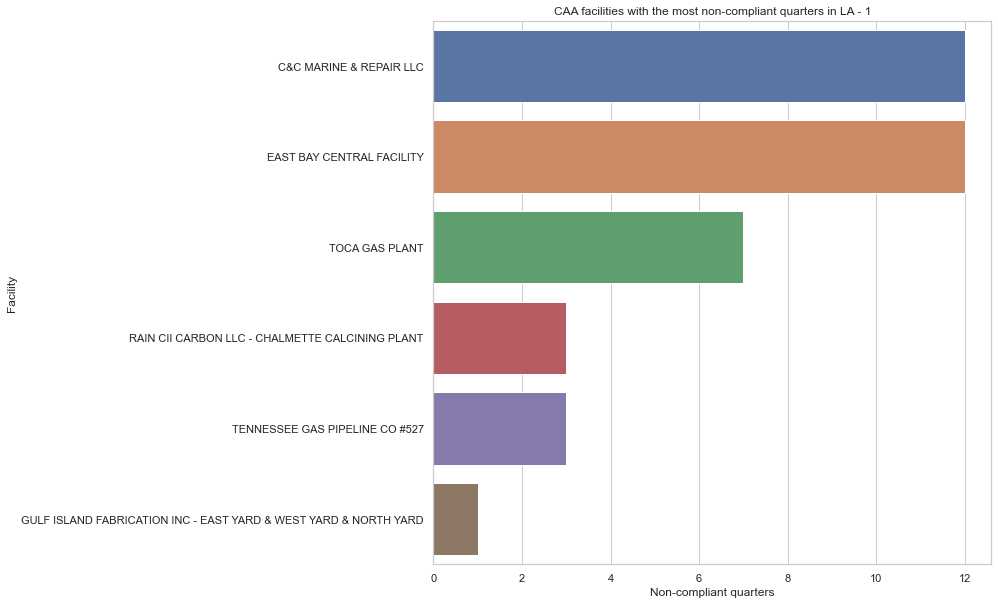

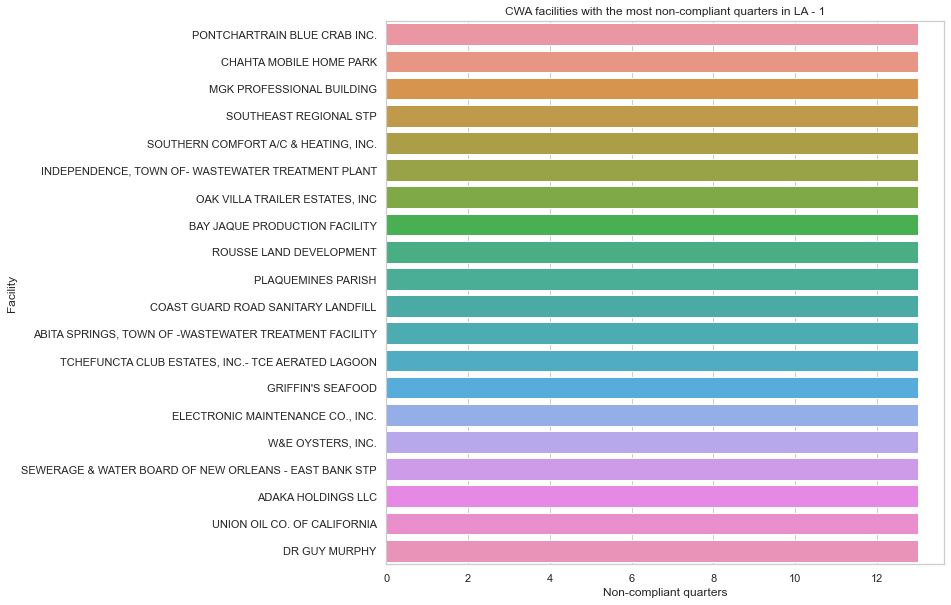

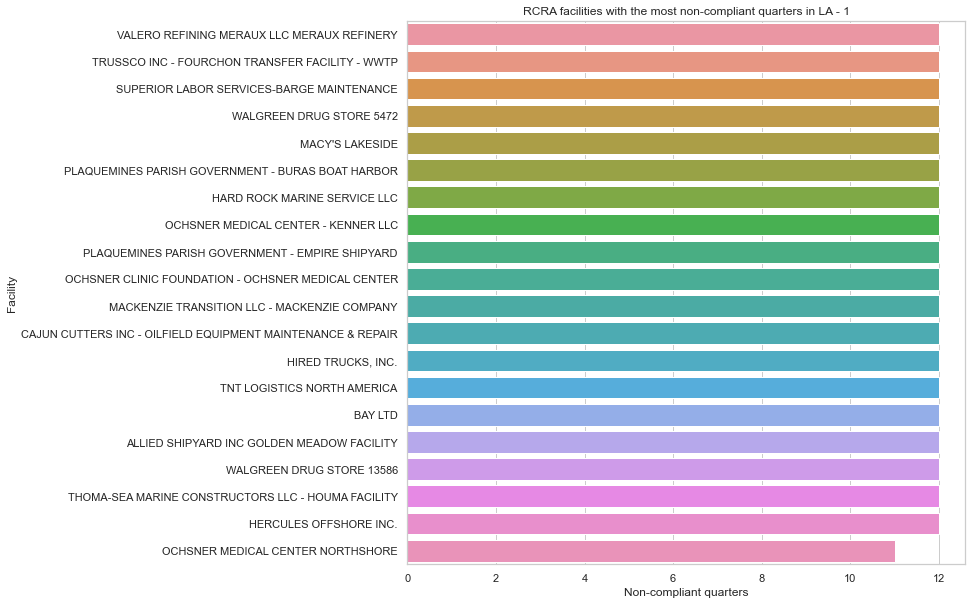

In [7]:
state = state_widget.value if state_widget is not None else None
region_selected = None

violators = list()

if ( region_type != 'State' ):
    region_selected = region_widget.value
df_active = get_active_facilities( state, region_type, region_selected )

df_violators = get_top_violators( df_active, 'AIR_FLAG', state, region_selected, 
        'CAA_3YR_COMPL_QTRS_HISTORY', 'CAA_FORMAL_ACTION_COUNT', 20 )
violators.extend(violator_facs("AIR_FLAG", df_violators))
display( chart_top_violators( df_violators, state, region_selected, 'CAA' ))

df_violators = get_top_violators( df_active, 'NPDES_FLAG', state, region_selected, 
        'CWA_13QTRS_COMPL_HISTORY', 'CWA_FORMAL_ACTION_COUNT', 20 )
violators.extend(violator_facs("AIR_FLAG", df_violators))
display( chart_top_violators( df_violators, state, region_selected, 'CWA' ))

df_violators = get_top_violators( df_active, 'RCRA_FLAG', state, region_selected, 
        'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FORMAL_ACTION_COUNT', 20 )
violators.extend(violator_facs("AIR_FLAG", df_violators))
display( chart_top_violators( df_violators, state, region_selected, 'RCRA' ))


#### 5.a Exploration of methods to tie in campaign contributions
This section looks at a process to bring in information from opensecrets.org on campaign contributions based on the active "violators" and a selection of a particular Congressional District. The idea came from the exercise that Kelsey ran us through in the ESIP Summer Meeting (July 23, 2021). This is a work in progress exploration of the idea with some thoughts on how it could be put into production.

To facilitate this, I grabbed an API key from opensecrets.org to see what that looks like. My conclusion is that it might be useful to return and work with closer to real time information for those things they are tracking that change often. However, to actually use the dataset, establishing connections between organization/facility identifiers and other properties would be better done with some prep work using bulk data from OpenSecrets. I requested that as well, but my request needs to be approved.

The following codeblocks are not something you'd want to include in a notebook like this. I provide it here to share some of the thinking and what might need to be done if you wanted to run a backend process via API vs. bulk data access.

In [8]:
# Get API key into memory with getpass()
opensecrets_api_key = getpass("OPEN SECRETS API KEY: ")

OPEN SECRETS API KEY: ········


I put together a couple of things as functions, mostly to handle converting XML responses from the OpenSecrets API into python objects, which I find much easier to work with.

In [9]:
def os_check_org(org_name):
    r = requests.get(f"https://www.opensecrets.org/api/?method=getOrgs&org={org_name}&apikey={opensecrets_api_key}")
    if r.status_code != 200:
        return
    
    d_org_response = xmltodict.parse(r.text, dict_constructor=dict)

    if "response" in d_org_response and "organization" in d_org_response["response"]:
        if isinstance(d_org_response["response"]["organization"], dict):
            org_list = [d_org_response["response"]["organization"]]
        else:
            org_list = d_org_response["response"]["organization"]

        orgs = list()
        for org in org_list:
            new_org = dict()
            for k,v in org.items():
                new_org[k.replace("@","")] = v
                orgs.append(new_org)
            
        return orgs

def os_legislators(state):
    r = requests.get(f"http://www.opensecrets.org/api/?method=getLegislators&id={state}&apikey={opensecrets_api_key}")
    if r.status_code != 200:
        return
    
    d_legislators = xmltodict.parse(r.text, dict_constructor=dict)
    return d_legislators
    
def os_org_contributions(orgid):
    r = requests.get(f"http://www.opensecrets.org/api/?method=orgSummary&id={orgid}&apikey={opensecrets_api_key}")
    if r.status_code != 200:
        return
    
    d_org_contribs = xmltodict.parse(r.text, dict_constructor=dict)
    return d_org_contribs

def os_candidate(state, district):
    state_district = f"{state}0{str(district)}"
    legislators = os_legislators(state)
    candidate = next((i for i in legislators["response"]["legislator"] if i["@office"] == state_district), None)
    if candidate is not None:
        return candidate
    else:
        return

def os_cand_contributions(cid, cycle="2020"):
    r = requests.get(f"https://www.opensecrets.org/api/?method=candContrib&cid={cid}&cycle={cycle}&apikey={opensecrets_api_key}")
    if r.status_code != 200:
        return
    
    d_cand_contribs = xmltodict.parse(r.text, dict_constructor=dict)
    return d_cand_contribs


Notionally, in an app liks this we would want something responsive to the user input, diving into a particular state, county, congressional district, etc. I added something to the previous workflow to build top violators and plot those to add each set to an array for further use. That gives us the top 20 violators and the category/flag. I then pull out the unique "FAC_NAME" values, which appear to be the main thing to try and match to organization names in OpenSecrets.

In [10]:
print(region_type_widget.value)
print(state_widget.value)
print(region_widget.value)

violator_unique_names = list(set([i["FAC_NAME"] for i in violators]))
print(len(violator_unique_names))

Congressional District
LA
1
46


This is where the real bottlenecks are going to be and why a bulk data process to line up OpenSecrets data with what EDGI has in their data system will really be the way to go. There are thousands of individual facility names in the underlying EPA data, and trying to run those through a lookup process one at a time based on the OpenSecrets REST API is really not feasible. You might also need to pull mutiple pieces of information on facilities and organizations in the EPA data together in order to establish more certain links to OpenSecrets data. You could probably run these queries in parallel, but that might piss someone off on the OpenSecrets end.

In [11]:
%%time
os_fac_matches = list()
for name in violator_unique_names:
    os_fac_matches.append({
        "edgi_fac_name": name,
        "os_org_records": os_check_org(name)
    })


CPU times: user 976 ms, sys: 67.7 ms, total: 1.04 s
Wall time: 28.6 s


From the looped check through our top violators for LA Congressional District 1, we get just a few hits. We also notice that the flightly fuzzy search on the OpenSecrets end come up with multiple results that might introduce some uncertainty.

In [12]:
violators

[{'flag': 'AIR_FLAG', 'FAC_NAME': 'C&C MARINE & REPAIR LLC'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'EAST BAY CENTRAL FACILITY'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'TOCA GAS PLANT'},
 {'flag': 'AIR_FLAG',
  'FAC_NAME': 'RAIN CII CARBON LLC - CHALMETTE CALCINING PLANT'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'TENNESSEE GAS PIPELINE CO #527'},
 {'flag': 'AIR_FLAG',
  'FAC_NAME': 'GULF ISLAND FABRICATION INC - EAST YARD & WEST YARD & NORTH YARD'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'PONTCHARTRAIN BLUE CRAB INC.'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'CHAHTA MOBILE HOME PARK'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'MGK PROFESSIONAL BUILDING'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'SOUTHEAST REGIONAL STP'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'SOUTHERN COMFORT A/C & HEATING, INC.'},
 {'flag': 'AIR_FLAG',
  'FAC_NAME': 'INDEPENDENCE, TOWN OF- WASTEWATER TREATMENT PLANT'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'OAK VILLA TRAILER ESTATES, INC'},
 {'flag': 'AIR_FLAG', 'FAC_NAME': 'BAY JAQUE PRODUCTION FACILITY'},
 {'

Tying things back together from unique names and cleaning up the results for use, I only consider cases where there's an exact match on name and add unique OpenSecrets orgid values to the basic information collected as our top violators in each of three categories.

In [13]:
top_violator_os_matches = list()
for item in [i for i in os_fac_matches if i["os_org_records"] is not None]:
    possible_matches = [i for i in item["os_org_records"] if i["orgname"].lower() == item["edgi_fac_name"].lower()]
    if possible_matches:
        edgi_record = next((i for i in violators if i["FAC_NAME"] == item["edgi_fac_name"]), None)
        if edgi_record is not None:
            edgi_record["os_orgids"] = list(set([i["orgid"] for i in possible_matches]))
            top_violator_os_matches.append(edgi_record)


Out of the top violators, we only have one that has an exact match by name. That's a starting point, but we really need to do the harder work of munging things together on who these organizations actually are and getting as many identifiers lined up between the two systems as we can. Then everything else will come together.

In [14]:
top_violator_os_matches

[{'flag': 'AIR_FLAG', 'FAC_NAME': 'BAY LTD', 'os_orgids': ['D000060277']}]

This is where I've kind of begged off this particular approach. We can hit another API end point from OpenSecrets on orgids we've managed to link and get campaign contrbutions, but what we're seeing is highly denormalized data where we have lots of other identifiers we have to put back together. If you go visit the web site referenced in this record, we can see that "BAY LTD" gave $367 from an individual to the campaign of Steve Scalise in 2020.

In [15]:
for v in top_violator_os_matches:
    print(v["FAC_NAME"], v["flag"])
    for orgid in v["os_orgids"]:
        display(os_org_contributions(orgid))

BAY LTD AIR_FLAG


{'response': {'organization': {'@cycle': '2020',
   '@orgid': 'D000060277',
   '@orgname': 'Bay Ltd',
   '@total': '32099',
   '@indivs': '32099',
   '@pacs': '0',
   '@soft': '0',
   '@tot527': '0',
   '@dems': '155',
   '@repubs': '31894',
   '@lobbying': '0',
   '@outside': '0',
   '@mems_invested': '0',
   '@gave_to_pac': '0',
   '@gave_to_party': '12090',
   '@gave_to_527': '0',
   '@gave_to_cand': '19959',
   '@source': 'www.opensecrets.org/orgs/summary.php?id=D000060277'}}}

I took this about as far as I can from this point. The actual funding data through the API appears to be summarized to the top (n) contributions and will not provide everything. I can plug in state and district to get the candidate and their ID and then get their top contributions for a given election cycle, but this does not turn anything up for our particular violator that we could get a match on. The web page lists a number for Bay Ltd, so it must be in OpenSecrets' data. We'll have to see if they supply that in their bulk data download.

In [16]:
candidate = os_candidate(state_widget.value, region_widget.value)
candidate

{'@cid': 'N00009660',
 '@firstlast': 'Steve Scalise',
 '@lastname': 'Scalise',
 '@party': 'R',
 '@office': 'LA01',
 '@gender': 'M',
 '@first_elected': '2008',
 '@exit_code': '0 ',
 '@comments': '',
 '@phone': '202-225-3015',
 '@fax': '202-226-0386',
 '@website': 'http://scalise.house.gov',
 '@webform': 'https://scalise.house.gov/contact-me/email-me',
 '@congress_office': '2338 Rayburn House Office Building',
 '@bioguide_id': 'S001176',
 '@votesmart_id': '9026',
 '@feccandid': 'H0LA01087',
 '@twitter_id': 'SteveScalise',
 '@youtube_url': 'https://youtube.com/RepSteveScalise',
 '@facebook_id': 'RepSteveScalise',
 '@birthdate': '1965-10-06'}

In [17]:
contributions = os_cand_contributions(candidate["@cid"])
contributions

{'response': {'contributors': {'@cand_name': 'Steve Scalise (R)',
   '@cid': 'N00009660',
   '@cycle': '2020',
   '@origin': 'Center for Responsive Politics',
   '@source': 'https://www.opensecrets.org/members-of-congress/contributors?cid=N00009660&cycle=2020',
   '@notice': "The organizations themselves did not donate, rather the money came from the organization's PAC, its individual members or employees or owners, and those individuals' immediate families.",
   'contributor': [{'@org_name': 'Votesane PAC',
     '@total': '106500',
     '@pacs': '0',
     '@indivs': '106500'},
    {'@org_name': 'Wells Fargo',
     '@total': '37466',
     '@pacs': '10000',
     '@indivs': '27466'},
    {'@org_name': 'American Airlines Group',
     '@total': '37084',
     '@pacs': '8500',
     '@indivs': '28584'},
    {'@org_name': 'Boeing Co',
     '@total': '34645',
     '@pacs': '10000',
     '@indivs': '24645'},
    {'@org_name': 'Raytheon Technologies',
     '@total': '34545',
     '@pacs': '10000'

## Get program-specific data for all the facilities in the region.
### First, choose the program (Air, Water, Drinking Water, and Hazardous Waste) and type of data (Emissions, Violations, Inspections, Enforcement) you want to explore

Running the code below will show you a dropdown you can use to make a selection. **Inspections** or **evaluations** are usually the first phase in the enforcement pipeline, how many (but not all) violations are discovered.  **Violations** happen when a facilty is found to be out of compliance with an environmental law, often by violating the terms of its permit issued under that law.  **Enforcement actions** happen when the regulating agency decides to initiate a "case" against a firm for its violation of an environmental law, either by considering some administrative penalty such as a fine or by taking the violator to court. 

What's available for you to look at here:

**Hazardous and Other Waste**:
- RCRA_EVALUATIONS = Inspections under RCRA
- RCRA_VIOLATIONS = Violations of RCRA rules
- RCRA_ENFORCEMENTS = Enforcement actions taken by state agencies and the EPA

Here's where you can find definitions of terms used in the columns of RCRA data: 
https://echo.epa.gov/tools/data-downloads/rcrainfo-download-summary 

**Air**:
- ICIS-AIR_VIOLATION_HISTORY = CAA violations
- ICIS-AIR_FCES_PCES = Both state and federal CAA compliance evaluations
- ICIS-AIR_FORMAL_ACTIONS = CAA formal enforcement actions

Here's where you can find definitions of terms used in the columns of Clean Air Act data: 
https://echo.epa.gov/tools/data-downloads/icis-air-download-summary

**Air Emissions** (Combined air emissions data for stationary sources from four EPA air programs: National Emissions Inventory (NEI), Greenhouse Gas Reporting Program (GHGRP), Toxic Release Inventory (TRI), and Clean Air Markets (CAMD)):
- Greenhouse Gases via POLL_RPT_COMBINED_EMISSIONS
- Toxic Releases via POLL_RPT_COMBINED_EMISSIONS

Here's where you can find definitions of terms used in the columns of this data: https://echo.epa.gov/tools/data-downloads/air-emissions-download-summary

**Water** (National Pollutant Discharge Elimination System, or NPDES):
- NPDES_QNCR_HISTORY = CWA Quarterly Non-Compliance History
- NPDES_INSPECTIONS = CWA Inspections
- NPDES_FORMAL_ENFORCEMENT_ACTIONS = CWA Enforcements

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/icis-npdes-download-summary

**Drinking Water** (Safe Drinking Water Act, or SDWA):
- SDWA_PUB_WATER_SYSTEMS = Public Water Systems under Safe Drinking Water Act
- SDWA_SITE_VISITS = Safe Drinking Water Site Visits
- SDWA_VIOLATIONS = Safe Drinking Water Violations
- SDWA_SERIOUS_VIOLATORS = Safe Drinking Water Serious Violators
- SDWA_ENFORCEMENTS = Safe Drinking Water Enforcements
- SDWA_RETURN_TO_COMPLIANCE = Safe Drinking Water Return to Compliance

Here's where you can find definitions of terms used in the columns of Clean Water Act data: https://echo.epa.gov/tools/data-downloads/sdwa-download-summary

### 6. This cell creates data sets for facilities in the region and presents a dropdown selection.

In [ ]:
data_sets = make_data_sets()

data_set_widget = show_data_set_widget( data_sets )

### 7. Once you've chosen the program and data type you want to focus on...
....run the code below, which will access our database and retrieve the information. 
#### This is the main query of the remote database.  It may take some time if there are thousands of facilities in your region that report to the selected program.

In [ ]:
program = data_sets[ data_set_widget.value ]
program_results = program.store_results( region_type=region_type, 
                            region_value=region_selected, state=state )
program_data = None
if ( program_results is not None ):
    program_data = program_results.dataframe.copy()

    display( program_data )
else:
    print( "There is no data for this data set in this region.")

## Create an interactive map of all of the facilities in the area that report to EPA under the selected program
### 8. Once you run this cell, a map should appear. Facilities will be clustered by area. You can zoom in and click on each facility to get its name and a link to a more detailed report.

_Note:_ You might find that there are some facilities located outside of the region you selected. That's probably because of an issue in how EPA generates spatial information for facilities.

States with a large number of facilities may not display properly.

In [ ]:
import geopandas

if ( program_data is not None ):
    df_to_map = program_data.loc[~program_data.index.duplicated(keep='first')]
    
    map_of_facilities = mapper(df_to_map)
    if ( region_type == 'State' or region_type == 'Congressional District' ):
        if ( region_type == 'Congressional District' and region_selected is not None ):
            url = "https://raw.githubusercontent.com/unitedstates/districts/gh-pages/cds/2016/{}-{}/shape.geojson".format( state, str(region_selected))
            map_data = geopandas.read_file(url)
            w = folium.GeoJson(
                map_data,
                name = "EPA Regions",
            ).add_to(map_of_facilities) #m is the map object created to hold the facility points. we want to add this shape object to that map object
            folium.GeoJsonTooltip(fields=["District"]).add_to(w)
        if ( region_type == 'State' ):
            url = "https://github.com/edgi-govdata-archiving/ECHO-Geo/raw/main/states.geojson"
            map_data = geopandas.read_file( url )
            state_data = map_data[ map_data['STUSPS'] == state ]
            w = folium.GeoJson( state_data, name="State" ).add_to( map_of_facilities )

    display( map_of_facilities ) 
else:
    print( "There are no facilities in the region for this data set." )   


In [ ]:
%run ECHO_modules/utilities.py

### 9. Chart this data set

In [ ]:
program_results.show_chart()

### 10.  In this cell you may save the program data for your region to your computer.
To access your files click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
if ( len( program_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=program_data, base=program.name, type=region_type_widget.value, 
           state=state_name, region=region_selected )
else:
    print( "There is no data for this program and region." )

#### If you'd like to look at another dimension of ECHO data for this region...
....return to the dropdown menu in Step 6 and choose a different program/data type, run the database access code, and then map and chart it!

---

## Choose a specific facility
### 11. In the next few blocks of code, you can focus in on just one facility in the region.
Run the below cell, then choose a facility from the dropdown that appears.

In [ ]:
fac_series = program_data["FAC_NAME"]
fac_widget = show_fac_widget( fac_series )

### 12. Let's see the data for this facility

In [ ]:
fac_pgm_data = program_data[ program_data["FAC_NAME"] == fac_widget.value ]

pd.set_option('display.max_colwidth', -1)

if ( fac_pgm_data is None or len( fac_pgm_data ) == 0 ):
    print( "There is no {} data for {} ".format( fac_pgm_widget.value, fac_widget.value ))
else:
    display( fac_pgm_data )

### 13. This cell saves this facility's data for this program to your computer.

To access your files click on the 'Files' tab in the menu on the left-hand side of the notebook (it looks like a folder). You may have to hit 'Refresh' if you don't see your file. Then, you can click on the ... next to your file and choose "Download". The CSV spreadsheet will download to wherever your browser usually saves files (e.g. Downloads folder)

In [ ]:
# fac_pgm_data = add_fac_to_pgm_data( fac_pgm_data, fac_data )
if ( len( fac_pgm_data ) > 0 ):
    state_name = None
    if ( state_widget is not None ):
        state_name = state_widget.value
    write_dataset( df=fac_pgm_data, base=program.name+'-'+fac_widget.value, 
               type=region_type_widget.value, state=state_name, region=region_selected )
else:
    print( "There is no data for this program and region." )

#### If you'd like to look at another dimension of ECHO data for this region...
....return to the dropdown menu in Step 6 and choose a different program/data type, run the database access code, and then map and chart it!

---